In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression


# Non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)



model_lr = LogisticRegression()
model_lr.fit(X, y)

print("Logistic Regression accuracy:", model_lr.score(X, y))





Logistic Regression accuracy: 0.85


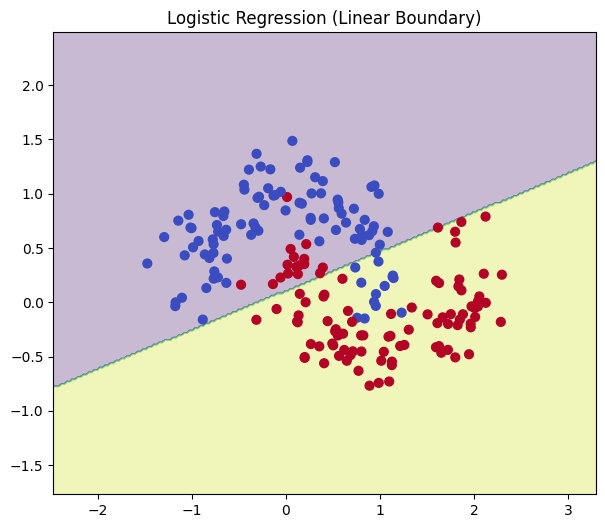

In [ ]:
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(7,6))

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40)
    plt.title(title)
    plt.show()

plot_decision_boundary(model_lr, X, y, "Logistic Regression (Linear Boundary)")

Number of misclassified points: 30


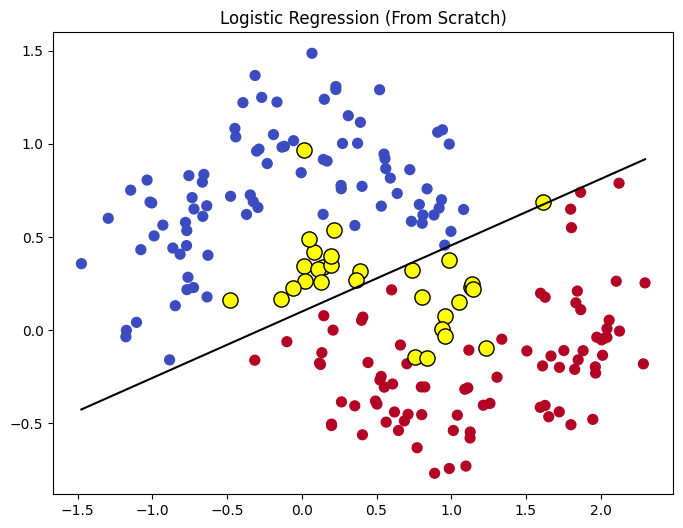

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 1️⃣ Non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Reshape y to column vector
y = y.reshape(-1, 1)

# Add bias column (intercept term)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# 2️⃣ Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 3️⃣ Loss function (Binary Cross Entropy)
def compute_loss(X, y, w):
    m = len(y)
    z = X @ w
    h = sigmoid(z)
    loss = -(1/m) * np.sum(
        y * np.log(h + 1e-9) +
        (1 - y) * np.log(1 - h + 1e-9)
    )
    return loss

# 4️⃣ Gradient Descent
def train_logistic_regression(X, y, lr=0.1, epochs=5000):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []

    for _ in range(epochs):
        z = X @ w
        h = sigmoid(z)

        gradient = (1/m) * X.T @ (h - y)
        w -= lr * gradient

        losses.append(compute_loss(X, y, w))

    return w, losses

# Train model
w, losses = train_logistic_regression(X_bias, y, lr=0.1, epochs=1000)

# 5️⃣ Prediction
def predict(X, w):
    probs = sigmoid(X @ w)
    return (probs >= 0.5).astype(int)

y_pred = predict(X_bias, w)
misclassified = (y_pred != y).flatten()

print("Number of misclassified points:", misclassified.sum())

# 📊 Plot
plt.figure(figsize=(8,6))

# Correctly classified
plt.scatter(X[~misclassified, 0],
            X[~misclassified, 1],
            c=y[~misclassified],
            cmap='coolwarm',
            s=50)

# Misclassified
plt.scatter(X[misclassified, 0],
            X[misclassified, 1],
            c='yellow',
            edgecolors='black',
            s=120)

# Decision boundary
x_values = np.linspace(X[:,0].min(), X[:,0].max(), 100)

# w = [b, w1, w2]
y_values = -(w[0] + w[1]*x_values) / w[2]

plt.plot(x_values, y_values, color='black')
plt.title("Logistic Regression (From Scratch)")
plt.show()
